# Tandem Repeats 

In [1]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter, defaultdict
from dotenv import load_dotenv
from pathlib import Path
import os
import warnings

warnings.filterwarnings("ignore")
load_dotenv('env.txt')

True

In [2]:
domains = ["Archaea", "Eukaryota", "Bacteria", "Viruses"]
domain_colors = {'Viruses': '#6bb5c7',
 'Eukaryota': '#e69c3c',
 'Archaea': '#b2b2ff',
 'Bacteria': '#a3c4a3'}

kingdom_color_palette = {
                          "Viruses": "#6bb5c7",
                         "Bacteria": "#0fbf2d",
                         "Archaea": "#b2b2ff",
                         "Fungi": "#4d325e",
                         "Plantae": "#b50996",
                        "Eubacteria": "#0fbf2d",
                        "Animalia": "#9bba2d",
                        "Protista": "#c78f5b",
                          "Archaeabacteria": "#7b7bed",
                } 


In [3]:
target = Path(os.getenv("tandem_path"))

In [4]:
tdf = pd.read_parquet(target.joinpath("tandem_repeats_database.parquet.snappy"), engine="fastparquet")
tdf

,#assembly_accession,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence,genome_size,gc_percent,organism_name,phylum,kingdom,superkingdom
index,,,,,,,,,,,,,,,
0,GCA_000007325.1,AE009951.2,16462,16473,12,3,4,gat,gatgatgatgat,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
1,GCA_000007325.1,AE009951.2,43331,43342,12,3,4,ctt,cttcttcttctt,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
2,GCA_000007325.1,AE009951.2,73427,73438,12,3,4,tta,ttattattatta,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
3,GCA_000007325.1,AE009951.2,79616,79627,12,3,4,tgt,tgttgttgttgt,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
4,GCA_000007325.1,AE009951.2,87815,87826,12,3,4,ttc,ttcttcttcttc,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81864632,GCF_963920505.1,NZ_OY986433.1,3066044,3066055,12,3,4,gct,gctgctgctgct,3085273,66.0,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
81864633,GCF_963920505.1,NZ_OY986433.1,3069465,3069474,10,2,5,ct,ctctctctct,3085273,66.0,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
81864634,GCF_963920505.1,NZ_OY986433.1,3079507,3079518,12,3,4,gcc,gccgccgccgcc,3085273,66.0,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria


In [6]:
grouped = tdf.sort_values(by=['length'], ascending=False)
grouped

,#assembly_accession,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence,genome_size,gc_percent,organism_name,phylum,kingdom,superkingdom
index,,,,,,,,,,,,,,,
8388791,GCA_022117705.1,CM039151.1,198057926,198293329,235404,3,78468,tac,tactactactactactactactactactactactactactactact...,2178604320,47.0,Zea mays,Streptophyta,Plantae,Eukaryota
8328826,GCA_022117705.1,CM039151.1,800001,975578,175578,3,58526,tag,tagtagtagtagtagtagtagtagtagtagtagtagtagtagtagt...,2178604320,47.0,Zea mays,Streptophyta,Plantae,Eukaryota
8293874,GCA_022117705.1,CM039150.1,225887446,226041984,154539,3,51513,tag,tagtagtagtagtagtagtagtagtagtagtagtagtagtagtagt...,2178604320,47.0,Zea mays,Streptophyta,Plantae,Eukaryota
8389960,GCA_022117705.1,CM039151.1,198474107,198604507,130401,3,43467,tac,tactactactactactactactactactactactactactactact...,2178604320,47.0,Zea mays,Streptophyta,Plantae,Eukaryota
8301536,GCA_022117705.1,CM039150.1,249375221,249477379,102159,3,34053,act,actactactactactactactactactactactactactactacta...,2178604320,47.0,Zea mays,Streptophyta,Plantae,Eukaryota
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220421,GCA_028201415.1,CP116377.1,13233055,13233064,10,1,10,t,tttttttttt,98826088,35.5,Caenorhabditis elegans,Nematoda,Animalia,Eukaryota
31956314,GCA_031234615.1,CP124731.1,323196114,323196123,10,1,10,a,aaaaaaaaaa,3103116129,35.0,Capsicum annuum,Streptophyta,Plantae,Eukaryota
17220419,GCA_028201415.1,CP116377.1,13230622,13230631,10,1,10,a,aaaaaaaaaa,98826088,35.5,Caenorhabditis elegans,Nematoda,Animalia,Eukaryota


In [16]:
tandem_accessions = set(tdf['#assembly_accession'])
len(tandem_accessions)

97536

In [17]:
empty_viral = 19712
empty_bacteria = 5

In [18]:
empty_accessions = pd.read_parquet(target.joinpath("empty_assemblies_tandem_repeats.parquet.snappy"))\
                        .set_index("#assembly_accession")
empty_accessions.loc[:, "coverage"] = 0.0
empty_accessions.loc[:, "length"] = 0
empty_accessions.loc[:, "tandemdensity"] = 0
empty_accessions

,group,genome_size,gc_percent,organism_name,phylum,kingdom,superkingdom,coverage,length,tandemdensity
#assembly_accession,,,,,,,,,,
GCA_031321985.1,viral,2004,47.5,Human-associated circovirus 2,Cressdnaviricota,Shotokuvirae,Viruses,0.0,0,0
GCA_002540475.1,viral,5577,46.0,Enterobacteria phage ID11,Phixviricota,Sangervirae,Viruses,0.0,0,0
GCA_003624775.1,viral,2798,47.0,Cressdnaviricota sp.,Cressdnaviricota,Shotokuvirae,Viruses,0.0,0,0
GCA_004068335.1,viral,1767,48.5,Porcine circovirus 2,Cressdnaviricota,Shotokuvirae,Viruses,0.0,0,0
GCF_001502275.1,viral,61235,44.5,Escherichia phage slur01,Uroviricota,Heunggongvirae,Viruses,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
GCF_013086115.1,viral,12196,53.5,Fusarium redolens polymycovirus 1,None,Unclassified Viruses,Viruses,0.0,0,0
GCA_003823715.1,viral,5241,45.5,Microviridae sp.,Phixviricota,Sangervirae,Viruses,0.0,0,0
GCA_004044375.1,viral,1767,48.5,Porcine circovirus 2,Cressdnaviricota,Shotokuvirae,Viruses,0.0,0,0


In [19]:
tdf.isna().sum()

#assembly_accession          0
chromosome                   0
start                        0
end                          0
length                       0
sru                          0
consensus_repeats            0
consensus                    0
sequence                     0
genome_size                  0
gc_percent                   0
organism_name                0
phylum                 1831405
kingdom                   4844
superkingdom                 0
dtype: int64

In [20]:
empty_accessions['superkingdom'].value_counts()

superkingdom
Viruses     19712
Bacteria        5
Name: count, dtype: int64

In [21]:
from pathlib import Path
figures = target.joinpath("figures")
figures.mkdir(exist_ok=True)

In [22]:
tdf_accessions = tdf.groupby("#assembly_accession")\
                                    .agg({
                                        "length": lambda ds: ds.sum(),
                                        "genome_size": "first",
                                        "superkingdom": "first",
                                        "kingdom": "first",
                                        "phylum": "first",
                                        "organism_name": "first",
                                        "gc_percent": "first",
                                        "consensus": "count",
                
                                       })\
                                    .rename(columns={"consensus": "tandem_counts"})\
                                    .assign(coverage=lambda ds: 1e6 * ds["length"].div(ds['genome_size']))\
                                    .assign(tandemdensity=lambda ds: 1e6 * ds['tandem_counts'].div(ds['genome_size']))

headers = tdf_accessions.columns
tdf_accessions = pd.concat([empty_accessions.drop(columns=['group']), 
                            tdf_accessions], axis=0)\
            .sort_values(by=['coverage'], ascending=False)

tdf_accessions

,genome_size,gc_percent,organism_name,phylum,kingdom,superkingdom,coverage,length,tandemdensity,tandem_counts
#assembly_accession,,,,,,,,,,
GCA_900632045.1,22641838,19.0,Plasmodium falciparum,Apicomplexa,Protista,Eukaryota,109181.993087,2472081,6163.633889,139556.0
GCF_000002765.6,23292622,19.5,Plasmodium falciparum 3D7,Apicomplexa,Protista,Eukaryota,108166.783456,2519488,6113.137456,142391.0
GCF_000848385.1,1801,42.0,Saccharomyces cerevisiae killer virus M1,None,Unclassified Viruses,Viruses,69405.885619,125,1110.494170,2.0
GCA_031087255.1,1042,42.5,Datura leaf curl betasatellite,None,Unclassified Viruses,Viruses,66218.809981,69,3838.771593,4.0
GCA_003652465.1,1051,48.5,Geminiviridae sp.,Cressdnaviricota,Shotokuvirae,Viruses,60894.386299,64,2854.424358,3.0
...,...,...,...,...,...,...,...,...,...,...
GCA_004079735.1,1767,48.5,Porcine circovirus 2,Cressdnaviricota,Shotokuvirae,Viruses,0.000000,0,0.000000,NaN
GCA_031113065.1,8304,48.0,VESV-like calicivirus,Pisuviricota,Orthornavirae,Viruses,0.000000,0,0.000000,NaN
GCA_004078715.1,1767,49.0,Porcine circovirus 2,Cressdnaviricota,Shotokuvirae,Viruses,0.000000,0,0.000000,NaN


In [23]:
tdf_accessions.to_csv(target.joinpath("grouped_accessions_tandem_density.csv.gz"), compression="gzip", index=True, mode="w")

In [24]:
tdf_accessions.describe(exclude=object)

,genome_size,gc_percent,coverage,length,tandemdensity,tandem_counts
count,1.172530e+05,117253.000000,117253.000000,1.172530e+05,117253.000000,9.753600e+04
mean,2.409669e+06,47.229035,1507.767327,1.142273e+04,110.080169,8.393274e+02
std,3.295079e+07,10.894935,2559.974558,6.416956e+05,182.218962,3.762490e+04
min,1.660000e+02,12.000000,0.000000,0.000000e+00,0.000000,1.000000e+00
25%,1.316600e+04,39.000000,410.193945,1.200000e+01,31.967803,3.000000e+00
50%,1.278190e+05,46.500000,788.632833,1.350000e+02,59.263652,6.200000e+01
75%,3.913662e+06,54.500000,1735.222165,2.267000e+03,130.005200,1.970000e+02
max,3.545834e+09,78.500000,109181.993087,1.108806e+08,6163.633889,5.115480e+06


Archaea 0.4403551117983911 1.0210228137258544e-33


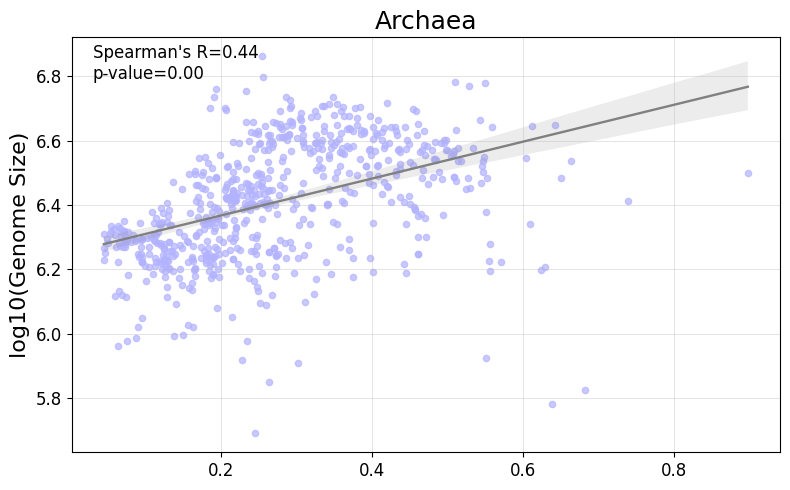

Eukaryota 0.38543210715945975 1.6119572613570506e-18


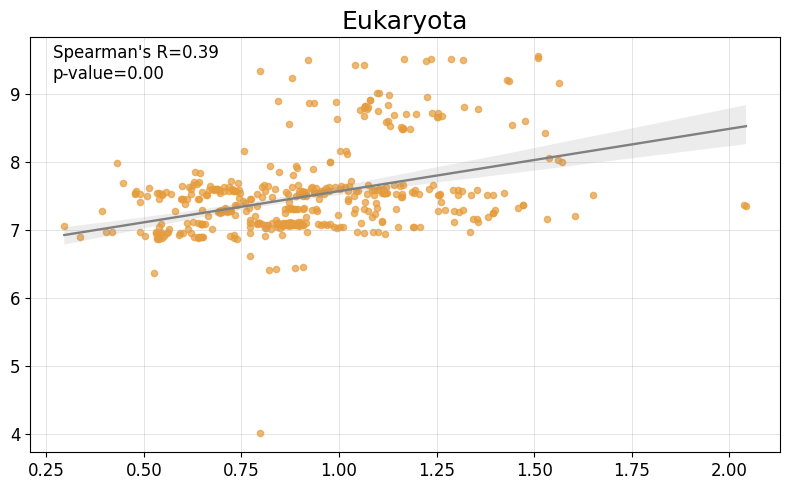

Bacteria -0.0944601732640684 1.0388132050051308e-96


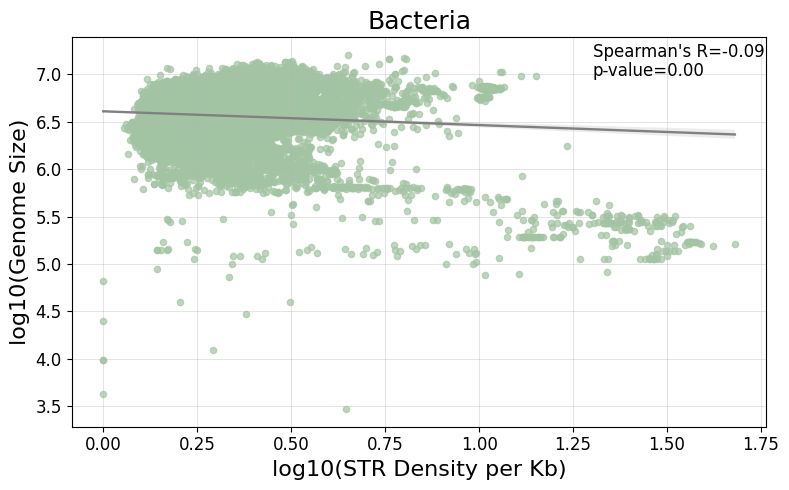

Viruses 0.17365227162137015 0.0


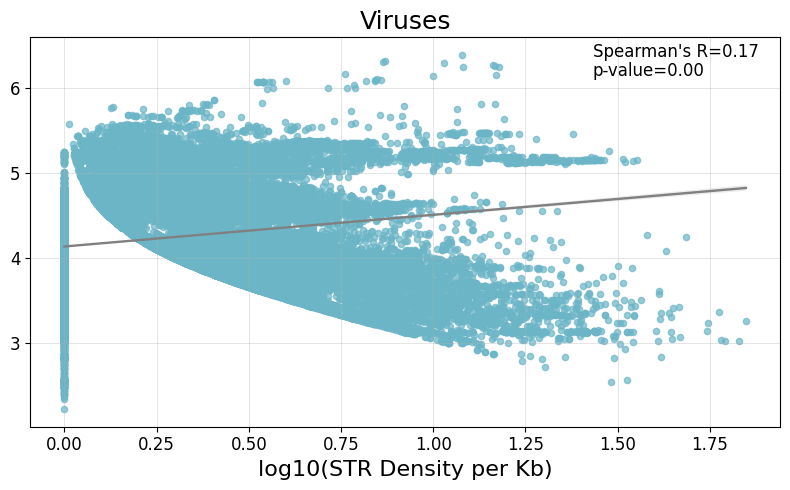

In [25]:
for domain in domains:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
    grouped_slice = tdf_accessions.query(f"superkingdom == '{domain}'")
    grouped_slice.loc[:, 'genome_size'] = grouped_slice['genome_size'].apply(lambda g: math.log(g + 1, 10))
    grouped_slice.loc[:, "coverage"] = grouped_slice["coverage"].apply(lambda g: math.log(g/1e3 + 1, 10))

    r, p = pearsonr(grouped_slice['coverage'], grouped_slice['genome_size'])
    sns.regplot(data=grouped_slice, color=domain_colors[domain], 
                x="coverage", 
                y="genome_size",  
                ci=95, 
                ax=ax,
               scatter_kws={"color": domain_colors[domain], "alpha": 0.7, 's': 20,}, 
                line_kws={"color": "gray", 
                          "lw": 1.7, 
                          "ls": "-"})

    print(domain, r, p)
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    if not (domain == "Viruses" or domain == "Eukaryota"):
        ax.set_ylabel("log10(Genome Size)")
    else:
        ax.set_ylabel("")
        
    if not (domain == "Archaea" or domain == "Eukaryota"):
        ax.set_xlabel("log10(STR Density per Kb)")
    else:
        ax.set_xlabel("")
        
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    ax.set_title(domain)
    ax.title.set_size(18)
    # ax.set_xlim(xmin=-0.05, xmax=grouped_slice['coverage'].max() + 0.05)
    ax.tick_params(axis="both", which="major", labelsize=12)
    plt.tight_layout()
    if domain == 'Viruses' or domain == 'Bacteria':
        plt.text(.75, 0.95, 'Spearman\'s R={:.2f}'.format(r), fontsize=12, transform=ax.transAxes)
        plt.text(.75, 0.90, 'p-value={:.2f}'.format(p), fontsize=12, transform=ax.transAxes)  
    else:
        plt.text(.03, 0.95, 'Spearman\'s R={:.2f}'.format(r), fontsize=12, transform=ax.transAxes)
        plt.text(.03, 0.90, 'p-value={:.2f}'.format(p), fontsize=12, transform=ax.transAxes)

    target = figures.joinpath("regplots")
    target.mkdir(exist_ok=True)
    fig.savefig(f"{target}/coverage_vs_genome_size_superkingdoms_{domain}.png", bbox_inches='tight')
    plt.show()

# Organismal Genome Density

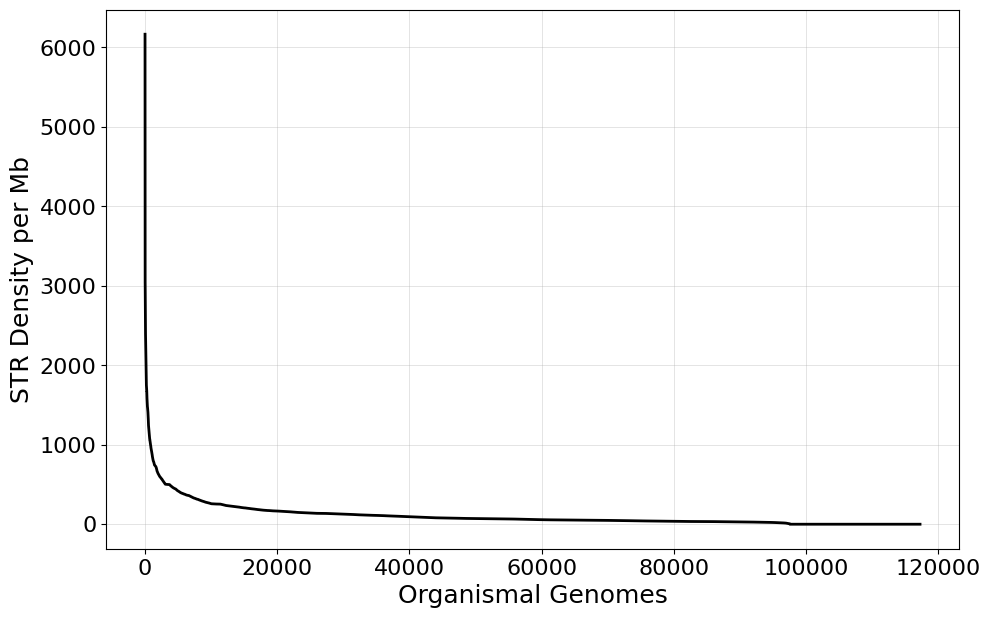

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 7))
tdf_accessions.sort_values(by=['tandemdensity'], ascending=False).reset_index().reset_index().plot(x='index', y='tandemdensity', lw=2.0, color='black', ax=ax)
ax.set_xlabel("Organismal Genomes")
ax.set_ylabel("STR Density per Mb")
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.legend(handles=[], frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(lw=0.4, alpha=0.6)

target = figures.joinpath("organismal")
target.mkdir(exist_ok=True)

fig.savefig(f"{target}/organismal_genomes_microsatellite.png", format="png", bbox_inches='tight')
# plt.savefig(f"{DATABASE}/organismal_genomes_irp.pdf", format="pdf", bbox_inches='tight')
plt.show()

# Domain Level Density

In [14]:
mean_density_domain = tdf_accessions.groupby("superkingdom", as_index=False)\
                                            .agg(
                                                mean_coverage=("tandemdensity", "mean"),
                                                std_err_coverage=("tandemdensity", lambda ds: ds.std() / ds.shape[0] ** 0.5)
                                                )
print(mean_density_domain)
target = figures.joinpath("coverage")
target.mkdir(exist_ok=True)
mean_density_domain.to_csv(f"{target}/minisatellites_mean_coverage_domain_level.csv")
mean_density_domain['superkingdom'] = pd.Categorical(mean_density_domain['superkingdom'], 
                                                         ["Archaea", "Eukaryota", "Bacteria", "Viruses"])
mean_density_domain.sort_values(by=["superkingdom"], inplace=True)
mean_density_domain

  superkingdom  mean_coverage  std_err_coverage
0      Archaea      75.076417          2.013685
1     Bacteria      81.209849          0.626861
2    Eukaryota     581.421843         24.757270
3      Viruses     127.851415          0.762913


,superkingdom,mean_coverage,std_err_coverage
0,Archaea,75.076417,2.013685
2,Eukaryota,581.421843,24.757270
1,Bacteria,81.209849,0.626861
3,Viruses,127.851415,0.762913


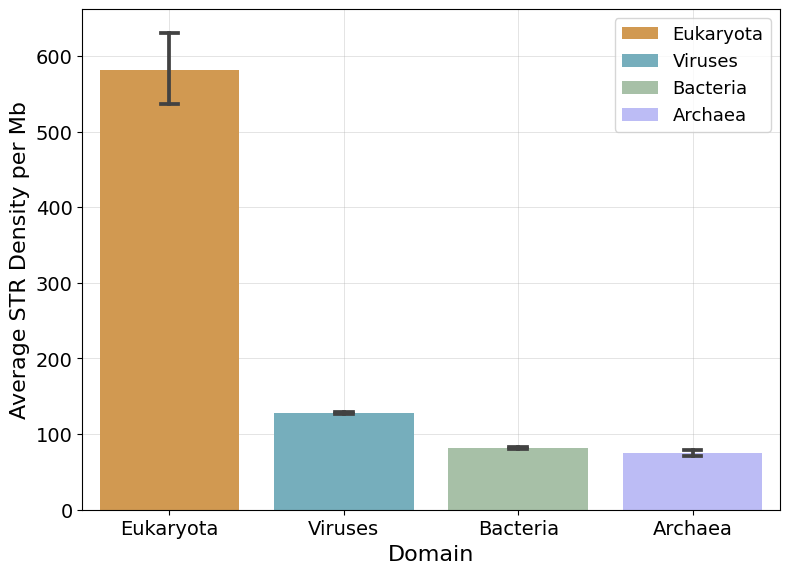

In [135]:
fig = plt.figure(figsize=(9, 6.5)) 
ax = sns.barplot(x='superkingdom', 
                 y='tandemdensity', 
                 # width=0.6, 
                 data=tdf_accessions, 
                 hue="superkingdom", 
                 dodge=False,
                 # height=0.5,
                 # aspect=0.4,
                 errorbar=('ci', 95),
                 # yerr=mean_density_domain["std_err_coverage"],
                 # errwidth=2.0,
                 capsize = 0.1,
                 # legend=True, 
                 palette=domain_colors,
                 alpha=1.0)

ax.xaxis.grid(True, linewidth=0.4, alpha=0.6, zorder=0)

# # ax.errorbar(x=x_coords, y=y_coords, yerr=mean_irp_density_domain["std_err_coverage"], fmt="none", c="k", zorder=1)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_axisbelow(True)
ax.set_xlabel("Domain")
ax.set_ylabel("Average STR Density per Mb")
ax.xaxis.label.set_size(16)
legend = ax.legend(prop={"size": 13}, 
                   fancybox=True, 
                   shadow=False, 
                   title='')
plt.setp(legend.get_title(),fontsize=14)


ax.yaxis.label.set_size(16)
ax.tick_params(axis="both",  which="major", labelsize=14)
fig.savefig(f"{target}/microsatellite_coverage_barplot_superkingdoms.png", bbox_inches='tight')
plt.show()

# Kingdom Density

In [26]:
mean_density_kingdom = tdf_accessions.groupby("kingdom", as_index=False)\
                                            .agg(median_coverage=("tandemdensity", "median"),
                                                 mean_coverage=("tandemdensity", "mean"),
                                                 std_err_coverage=("tandemdensity", lambda ds: ds.std() / (ds.shape[0] ** 0.5) ),
                                                 domain=("superkingdom", "first"),
                                                 total_species=("superkingdom", "count"),

                                                )\
                                        .assign(kingdom_color=lambda df: df[["domain", "kingdom"]].apply(lambda y: kingdom_color_palette[y['domain']] if y['domain'] in {"Viruses", "Archaea", "Bacteria"} \
                                                                                                                   else kingdom_color_palette[y['kingdom']], axis=1))\
                                        .dropna(subset=['std_err_coverage'])\
                                        .sort_values(by=["mean_coverage"], ascending=False)\
                                        .reset_index(drop=True)\
                                        .query("kingdom != 'Unclassified Viruses'")


mean_density_kingdom.to_csv(f"{target}/mean_coverage_minisatellite_kingdom_level.csv", index=False)
mean_density_kingdom

,kingdom,median_coverage,mean_coverage,std_err_coverage,domain,total_species,kingdom_color
0,Protista,1243.486982,1425.128529,250.822167,Eukaryota,32,#c78f5b
1,Animalia,917.560125,964.040347,66.888359,Eukaryota,25,#9bba2d
2,Plantae,742.528794,886.144858,57.359233,Eukaryota,50,#b50996
3,Fungi,377.681690,443.287903,14.797639,Eukaryota,375,#4d325e
4,Helvetiavirae,175.313949,252.175850,49.929711,Viruses,10,#6bb5c7
6,Bamfordvirae,137.471580,190.044182,1.513589,Viruses,6596,#6bb5c7
7,Loebvirae,132.664358,169.490780,9.777954,Viruses,362,#6bb5c7
8,Shotokuvirae,0.000000,161.570312,2.813198,Viruses,8724,#6bb5c7
9,Trapavirae,107.573150,131.584000,29.367276,Viruses,21,#6bb5c7
10,Zilligvirae,115.403537,130.798108,12.891550,Viruses,36,#6bb5c7


In [27]:
empty_all = []
for i in range(1, 10, 1):
    temp = empty_accessions.copy()
    temp.loc[:, "sru"] = i
    empty_all.append(temp)
empty_all = pd.concat(empty_all, axis=0)
empty_all

,group,genome_size,gc_percent,organism_name,phylum,kingdom,superkingdom,coverage,length,tandemdensity,sru
#assembly_accession,,,,,,,,,,,
GCA_031321985.1,viral,2004,47.5,Human-associated circovirus 2,Cressdnaviricota,Shotokuvirae,Viruses,0.0,0,0,1
GCA_002540475.1,viral,5577,46.0,Enterobacteria phage ID11,Phixviricota,Sangervirae,Viruses,0.0,0,0,1
GCA_003624775.1,viral,2798,47.0,Cressdnaviricota sp.,Cressdnaviricota,Shotokuvirae,Viruses,0.0,0,0,1
GCA_004068335.1,viral,1767,48.5,Porcine circovirus 2,Cressdnaviricota,Shotokuvirae,Viruses,0.0,0,0,1
GCF_001502275.1,viral,61235,44.5,Escherichia phage slur01,Uroviricota,Heunggongvirae,Viruses,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
GCF_013086115.1,viral,12196,53.5,Fusarium redolens polymycovirus 1,None,Unclassified Viruses,Viruses,0.0,0,0,9
GCA_003823715.1,viral,5241,45.5,Microviridae sp.,Phixviricota,Sangervirae,Viruses,0.0,0,0,9
GCA_004044375.1,viral,1767,48.5,Porcine circovirus 2,Cressdnaviricota,Shotokuvirae,Viruses,0.0,0,0,9


In [116]:
grouped_sru = tdf.groupby(["#assembly_accession", "sru"], as_index=False)\
                                .agg({"consensus": "count",
                                      "genome_size": "first",
                                      "superkingdom": "first",
                                      "kingdom": "first"
                                     })\
                                .assign(tandemDensity=lambda ds: 1e6 * ds['consensus'].div(ds['genome_size']))
empty_all.loc[:, "tandemDensity"] = 0.0
# grouped_sru = pd.concat([grouped_sru.set_index("#assembly_accession"), empty_all], axis=0)
grouped_sru

,#assembly_accession,sru,consensus,genome_size,superkingdom,kingdom,tandemDensity
0,GCA_000007325.1,1,13,2174500,Bacteria,Eubacteria,5.978386
1,GCA_000007325.1,2,45,2174500,Bacteria,Eubacteria,20.694413
2,GCA_000007325.1,3,61,2174500,Bacteria,Eubacteria,28.052426
3,GCA_000007325.1,4,50,2174500,Bacteria,Eubacteria,22.993792
4,GCA_000007325.1,5,13,2174500,Bacteria,Eubacteria,5.978386
...,...,...,...,...,...,...,...
501408,GCF_963920505.1,2,6,3085273,Bacteria,Eubacteria,1.944723
501409,GCF_963920505.1,3,408,3085273,Bacteria,Eubacteria,132.241134
501410,GCF_963920505.1,4,64,3085273,Bacteria,Eubacteria,20.743707
501411,GCF_963920505.1,5,6,3085273,Bacteria,Eubacteria,1.944723


### Add missing Repeating Unit Lengths to Non-Empty List

In [69]:
pivot_grouped_sru = grouped_sru.reset_index().pivot(index="#assembly_accession", columns="sru", values="tandemDensity")
pivot_grouped_sru = pivot_grouped_sru.fillna(0.0)
pivot_grouped_sru

sru,1,2,3,4,5,6,7,8,9
#assembly_accession,,,,,,,,,
GCA_000007325.1,5.978386,20.694413,28.052426,22.993792,5.978386,2.759255,0.459876,0.000000,0.000000
GCA_000007385.1,5.059255,54.235214,35.617155,16.189616,3.845034,11.737472,10.320880,0.607111,0.809481
GCA_000008005.1,2.577010,10.492113,16.198350,17.302783,1.104433,0.368144,0.184072,0.000000,1.472577
GCA_000008085.1,0.000000,16.297096,26.482781,20.371370,2.037137,0.000000,0.000000,0.000000,0.000000
GCA_000008885.1,219.059920,45.518944,59.743615,123.754630,22.759472,4.267401,1.422467,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
GCF_963920465.1,0.710061,3.550306,86.272424,22.366925,4.260367,4.970428,0.355031,0.000000,0.355031
GCF_963920475.1,3.115020,2.803518,130.207847,19.313126,2.492016,7.476049,0.000000,0.000000,0.311502
GCF_963920485.1,1.505639,0.752819,108.782390,29.359953,3.764097,6.022554,0.000000,0.376410,0.376410


In [70]:
pivot_grouped_sru[pivot_grouped_sru.index == 'GCF_013086115.1']

sru,1,2,3,4,5,6,7,8,9
#assembly_accession,,,,,,,,,
GCF_013086115.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
grouped_sru_melted = pivot_grouped_sru.reset_index().melt(id_vars=['#assembly_accession'], value_name="tandemDensity")\
                        .merge(tdf_accessions[["phylum", "kingdom", "superkingdom"]], 
                                   left_on="#assembly_accession", 
                                   right_index=True,
                               how="left")
grouped_sru_melted.loc[:, "kingdomRe"] = grouped_sru_melted["kingdom"].apply(lambda x: x if x in {"Fungi", "Plantae", "Protista", "Eubacteria", "Animalia", "Archaeabacteria"} else "Viruses")
grouped_sru_melted

,#assembly_accession,sru,tandemDensity,phylum,kingdom,superkingdom,kingdomRe
0,GCA_000007325.1,1,5.978386,Fusobacteriota,Eubacteria,Bacteria,Eubacteria
1,GCA_000007385.1,1,5.059255,Pseudomonadota,Eubacteria,Bacteria,Eubacteria
2,GCA_000008005.1,1,2.577010,Bacillota,Eubacteria,Bacteria,Eubacteria
3,GCA_000008085.1,1,0.000000,Nanoarchaeota,Archaeabacteria,Archaea,Archaeabacteria
4,GCA_000008885.1,1,219.059920,Pseudomonadota,Eubacteria,Bacteria,Eubacteria
...,...,...,...,...,...,...,...
1055272,GCF_963920465.1,9,0.355031,Cyanobacteriota,Eubacteria,Bacteria,Eubacteria
1055273,GCF_963920475.1,9,0.311502,Cyanobacteriota,Eubacteria,Bacteria,Eubacteria
1055274,GCF_963920485.1,9,0.376410,Cyanobacteriota,Eubacteria,Bacteria,Eubacteria
1055275,GCF_963920495.1,9,0.295501,Cyanobacteriota,Eubacteria,Bacteria,Eubacteria


In [128]:
grouped_sru_melted.to_csv(target.joinpath("grouped_accessions_tandem_sru_density.csv.gz"), compression="gzip", index=True, mode="w")

In [84]:
grouped_sru_kingdoms = grouped_sru_melted.groupby(["kingdomRe", "sru"], as_index=False).agg({"tandemDensity": "mean"})
grouped_sru_kingdoms.head()

,kingdomRe,sru,tandemDensity
0,Animalia,1,266.758182
1,Animalia,2,219.911762
2,Animalia,3,110.101565
3,Animalia,4,185.024217
4,Animalia,5,138.692177


In [ ]:
grouped_sru_domains = grouped_sru_melted.groupby(["superkingdom", "sru"], as_index=False).agg({"tandemDensity": "mean"})
grouped_sru_domains.head()

In [86]:
kingdom_color_palette.update({"Viruses": domain_colors["Viruses"]})
kingdom_color_palette

{'Viruses': '#6bb5c7',
 'Bacteria': '#0fbf2d',
 'Archaea': '#b2b2ff',
 'Fungi': '#4d325e',
 'Plantae': '#b50996',
 'Eubacteria': '#0fbf2d',
 'Animalia': '#9bba2d',
 'Protista': '#c78f5b',
 'Archaeabacteria': '#7b7bed'}

In [91]:
grouped_sru_melted.query("sru < 6").head()

,#assembly_accession,sru,tandemDensity,phylum,kingdom,superkingdom,kingdomRe
0,GCA_000007325.1,1,5.978386,Fusobacteriota,Eubacteria,Bacteria,Eubacteria
1,GCA_000007385.1,1,5.059255,Pseudomonadota,Eubacteria,Bacteria,Eubacteria
2,GCA_000008005.1,1,2.577010,Bacillota,Eubacteria,Bacteria,Eubacteria
3,GCA_000008085.1,1,0.000000,Nanoarchaeota,Archaeabacteria,Archaea,Archaeabacteria
4,GCA_000008885.1,1,219.059920,Pseudomonadota,Eubacteria,Bacteria,Eubacteria


/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


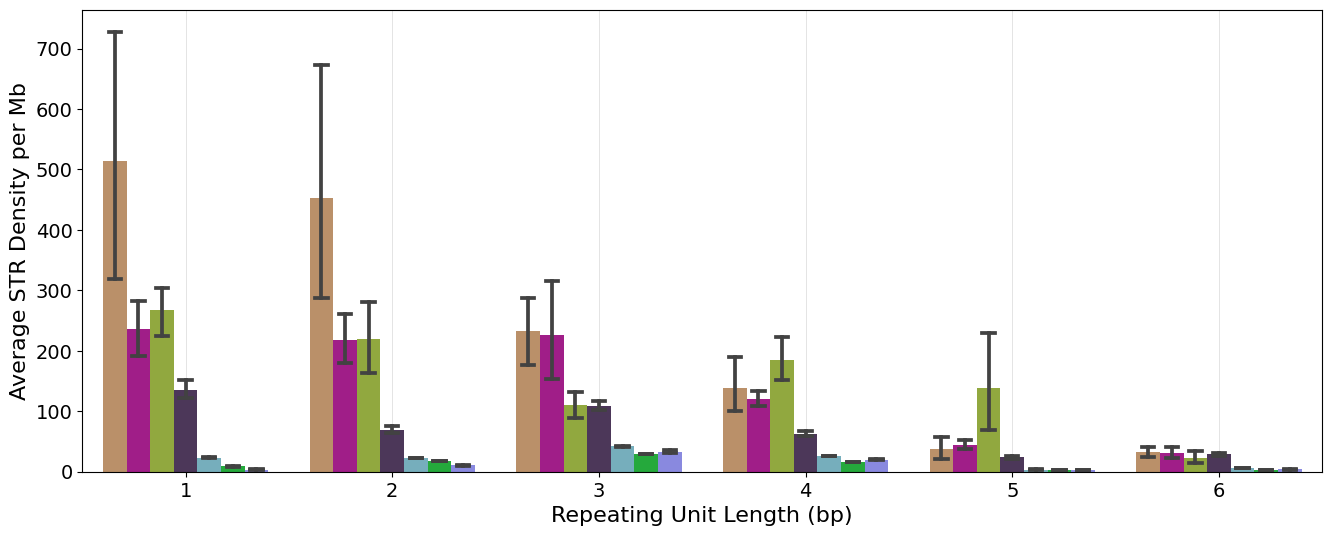

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
sns.barplot(y='tandemDensity', 
            x='sru',  
            width=0.8,
            dodge=True,
            capsize=.06,
            data=grouped_sru_melted.query("sru < 7"), 
            hue="kingdomRe", 
            palette=kingdom_color_palette,
            hue_order=["Protista", "Plantae", "Animalia", "Fungi", "Viruses", "Eubacteria", "Archaeabacteria"],
            ax=ax,
            alpha=1.0
           )

ax.xaxis.grid(True, linewidth=0.4, alpha=0.6, zorder=0)
ax.set_xlabel("Repeating Unit Length (bp)")
ax.yaxis.label.set_size(16)
ax.legend(title="", frameon=False, handles=[], bbox_to_anchor=(.35, 0.2), shadow=False, prop={"size": 18})
# # ax.set_xlim(0, 15.0)
ax.set_ylabel(r"Average STR Density per Mb")
ax.xaxis.label.set_size(16)
ax.tick_params(axis="both",  which="major", labelsize=14)
ax.set_axisbelow(True)

fig.savefig(f"{target}/microsatellite_tandemsru_density_over_kingdoms.png", bbox_inches='tight')
# plt.show();

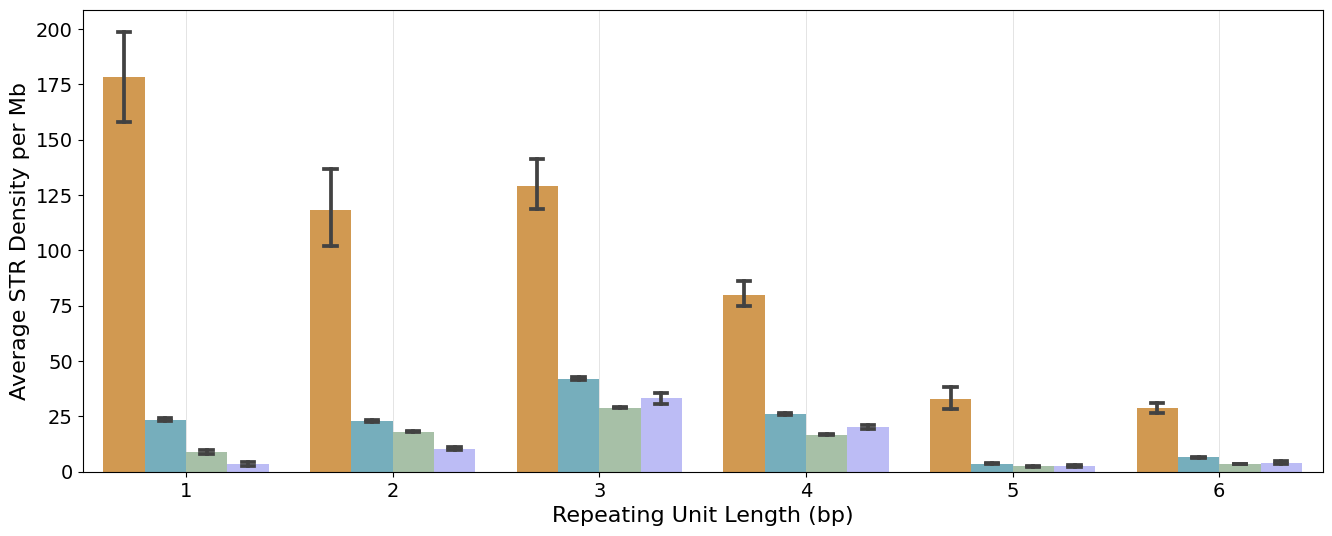

In [136]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
sns.barplot(y='tandemDensity', 
            x='sru',  
            width=0.8,
            dodge=True,
            capsize=.06,
            data=grouped_sru_melted.query("sru < 7"), 
            hue="superkingdom", 
            palette=domain_colors,
            hue_order=["Eukaryota", "Viruses", "Bacteria", "Archaea"],
            ax=ax,
            alpha=1.0
           )

ax.xaxis.grid(True, linewidth=0.4, alpha=0.6, zorder=0)
ax.set_xlabel("Repeating Unit Length (bp)")
ax.yaxis.label.set_size(16)
ax.legend(title="", frameon=False, handles=[], bbox_to_anchor=(.35, 0.2), shadow=False, prop={"size": 18})
# ax.set_xlim(0, 15.0)
ax.set_ylabel(r"Average STR Density per Mb")
ax.xaxis.label.set_size(16)
ax.tick_params(axis="both",  which="major", labelsize=14)
ax.set_axisbelow(True)

fig.savefig(f"{target}/microsatellite_tandemsru_density_over_domains.png", bbox_inches='tight')

# STR Kingdom Density

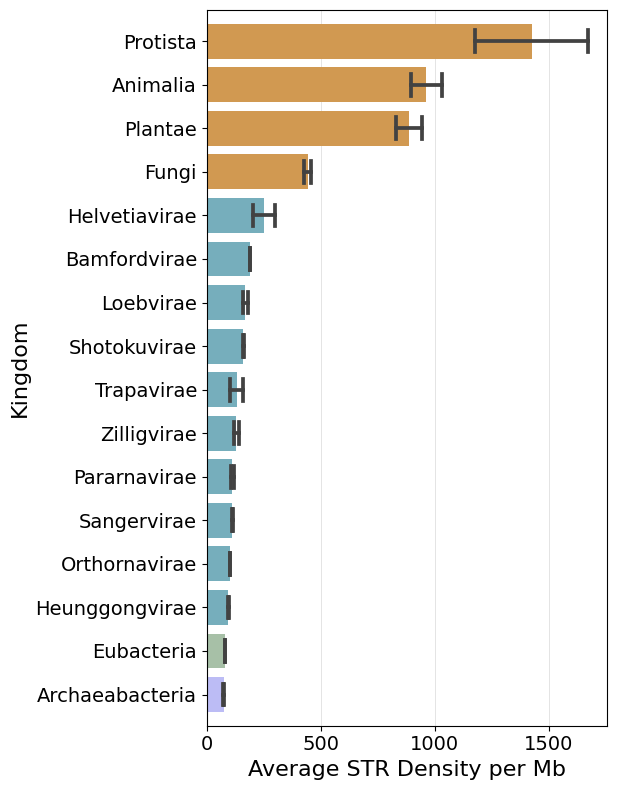

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 8))
kingdom_palette = mean_density_kingdom.set_index("kingdom")["kingdom_color"].to_dict()
sns.barplot(x='tandemdensity', 
            y='kingdom', 
            orient="h", 
            # width=0.5,
            dodge=False,
            # xerr=mean_density_kingdom['std_err_coverage'],
            errorbar=('se', .99), 
            capsize=.5,
            data=tdf_accessions.query("kingdom != 'Unclassified Viruses'"), 
            hue="superkingdom", 
            palette=domain_colors,
            order=tdf_accessions.query("kingdom != 'Unclassified Viruses'").groupby('kingdom', as_index=False).agg({'tandemdensity': 'mean'}).sort_values(by=['tandemdensity'], ascending=False)['kingdom'],
            ax=ax,
            alpha=1.0
           )

ax.xaxis.grid(True, linewidth=0.4, alpha=0.6, zorder=0)
ax.set_ylabel("Kingdom")
ax.yaxis.label.set_size(16)
ax.legend(title="", frameon=False, handles=[], bbox_to_anchor=(.35, 0.2), shadow=False, prop={"size": 18})
# ax.set_xlim(0, 15.0)
ax.set_xlabel(r"Average STR Density per Mb")
ax.xaxis.label.set_size(16)
ax.tick_params(axis="both",  which="major", labelsize=14)
ax.set_axisbelow(True)
ax.margins(y=0.02)

plt.tight_layout()
fig.savefig(f"{target}/microsatellite_coverage_over_kingdoms.png", bbox_inches='tight')
plt.show();

# Phylum Density

In [43]:
kingdom_color_palette

{'Viruses': '#6bb5c7',
 'Bacteria': '#0fbf2d',
 'Archaea': '#b2b2ff',
 'Fungi': '#4d325e',
 'Plantae': '#b50996',
 'Eubacteria': '#0fbf2d',
 'Animalia': '#9bba2d',
 'Protista': '#c78f5b',
 'Archaeabacteria': '#7b7bed'}

In [16]:
mean_density_phyla = tdf_accessions.dropna(subset=['phylum']).groupby("phylum", as_index=False)\
                                            .agg(mean_coverage=("tandemdensity", "mean"),
                                                std_err_coverage=("tandemdensity", lambda ds: ds.std() / (ds.shape[0] ** 0.5) ),
                                                domain=("superkingdom", "first"),
                                                 total_species=("superkingdom", "count"),
                                                 kingdom=("kingdom", "first"),
                                                 
                                                )\
                                        .assign(kingdom=lambda df: df['kingdom'].apply(lambda y: "Viruses" if y not in {"Archaeabacteria", "Eubacteria", "Protista", "Animalia", "Plantae", "Fungi"} else y))\
                                        .assign(kingdom_color=lambda df: df['kingdom'].map(kingdom_color_palette))\
                                        .dropna(subset=['std_err_coverage'])\
                                        .sort_values(by=["mean_coverage"], ascending=False)\
                                        .reset_index(drop=True)

mean_density_phyla.to_csv(f"{target}/mean_coverage_microsatellites_phylum_level.csv")
mean_density_phyla.head(40)

,phylum,mean_coverage,std_err_coverage,domain,total_species,kingdom,kingdom_color
0,Euglenozoa,1550.799879,158.242660,Eukaryota,12,Protista,#c78f5b
1,Apicomplexa,1442.331627,432.446127,Eukaryota,18,Protista,#c78f5b
2,Chlorophyta,1236.458570,181.456208,Eukaryota,10,Plantae,#b50996
3,Chordata,1151.281101,71.997263,Eukaryota,15,Animalia,#9bba2d
4,Streptophyta,815.183641,48.864977,Eukaryota,37,Plantae,#b50996
5,Arthropoda,711.767799,100.664129,Eukaryota,5,Animalia,#9bba2d
6,Nematoda,653.301199,1.094871,Eukaryota,2,Animalia,#9bba2d
7,Ascomycota,475.185622,17.656347,Eukaryota,284,Fungi,#4d325e
8,Peploviricota,365.639662,10.041656,Viruses,1413,Viruses,#6bb5c7
9,Basidiomycota,334.317053,20.146694,Eukaryota,77,Fungi,#4d325e


In [17]:
mean_density_phyla.sort_values(by=['mean_coverage'], ascending=False).query("phylum == 'Pseudomonadota'")

,phylum,mean_coverage,std_err_coverage,domain,total_species,kingdom,kingdom_color
43,Pseudomonadota,90.044047,1.046804,Bacteria,25927,Eubacteria,#0fbf2d


In [37]:
top_phyla = set(mean_density_phyla.iloc[:mean_density_phyla.shape[0]//2]['phylum'])
bottom_phyla = set(mean_density_phyla.iloc[mean_density_phyla.shape[0]//2:]['phylum'])
len(top_phyla), len(bottom_phyla), mean_density_phyla.shape[0]

(51, 51, 102)

In [20]:
phyla_all = tdf_accessions.dropna(subset=['phylum'])
phyla_all

,genome_size,gc_percent,organism_name,phylum,kingdom,superkingdom,coverage,length,tandemdensity,tandem_counts
#assembly_accession,,,,,,,,,,
GCA_900632045.1,22641838,19.0,Plasmodium falciparum,Apicomplexa,Protista,Eukaryota,109181.993087,2472081,6163.633889,139556.0
GCF_000002765.6,23292622,19.5,Plasmodium falciparum 3D7,Apicomplexa,Protista,Eukaryota,108166.783456,2519488,6113.137456,142391.0
GCA_003652465.1,1051,48.5,Geminiviridae sp.,Cressdnaviricota,Shotokuvirae,Viruses,60894.386299,64,2854.424358,3.0
GCA_003623535.1,1077,46.5,Cressdnaviricota sp.,Cressdnaviricota,Shotokuvirae,Viruses,59424.326834,64,2785.515320,3.0
GCA_031311565.1,2625,44.0,Chifec virus UA13_58,Cressdnaviricota,Shotokuvirae,Viruses,45333.333333,119,380.952381,1.0
...,...,...,...,...,...,...,...,...,...,...
GCA_031313935.1,27776,37.5,Porcine respiratory coronavirus 137,Pisuviricota,Orthornavirae,Viruses,0.000000,0,0.000000,NaN
GCA_004079735.1,1767,48.5,Porcine circovirus 2,Cressdnaviricota,Shotokuvirae,Viruses,0.000000,0,0.000000,NaN
GCA_031113065.1,8304,48.0,VESV-like calicivirus,Pisuviricota,Orthornavirae,Viruses,0.000000,0,0.000000,NaN


In [21]:
kingdom_color_palette

{'Viruses': '#6bb5c7',
 'Bacteria': '#0fbf2d',
 'Archaea': '#b2b2ff',
 'Fungi': '#4d325e',
 'Plantae': '#b50996',
 'Eubacteria': '#0fbf2d',
 'Animalia': '#9bba2d',
 'Protista': '#c78f5b',
 'Archaeabacteria': '#7b7bed'}

In [22]:
phyla_all['kingdom'] = phyla_all['kingdom'].apply(lambda y: 'Viruses' if y not in {'Eubacteria', 'Archaeabacteria', 'Fungi', 'Plantae', 'Animalia', 'Protista'} else y)

In [38]:
top_phyla_df = phyla_all[phyla_all['phylum'].isin(top_phyla)]
bottom_phyla_df = phyla_all[phyla_all['phylum'].isin(bottom_phyla)]
len(top_phyla_df), len(bottom_phyla_df)

(69389, 37099)

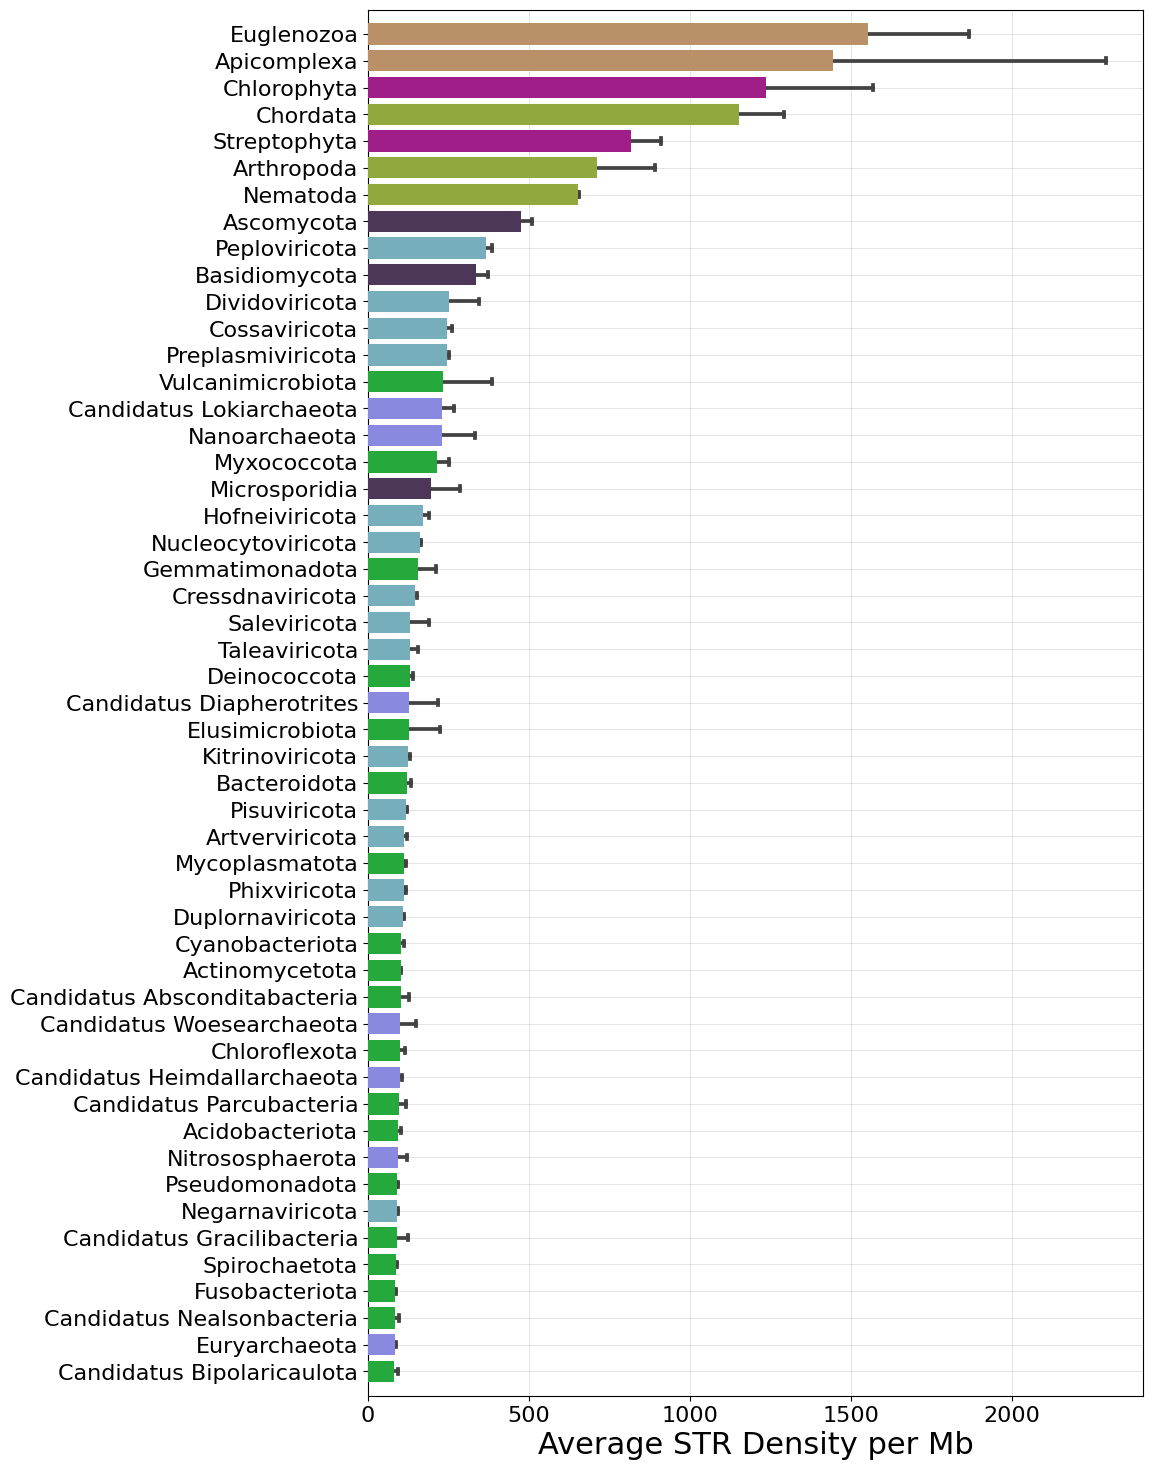

In [61]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 18))
sns.barplot(x='tandemdensity', 
            y='phylum',
            data=top_phyla_df,
            orient="h",
            ax=ax1,
            width=0.8,
            alpha=1.0,
            dodge=False,
            capsize=.2,
            zorder=3,
            hue="kingdom",
            palette=kingdom_color_palette,
            order=mean_density_phyla[mean_density_phyla['phylum'].isin(top_phyla)].sort_values(by=['mean_coverage'], ascending=False)['phylum'].tolist(),
)      
ax1.grid(lw=0.4, alpha=0.6, zorder=0)
ax1.set_xlabel("Average STR Density per Mb")
ax1.xaxis.label.set_size(22)
ax1.set_ylabel("")
ax1.tick_params(axis="both", which="major", labelsize=16)
ax1.legend(loc=0, frameon=False, handles=[])
ax1.set_axisbelow(True)
ax1.margins(y=0.01)

fig1.savefig(f"{target}/microsatellite_coverage_over_top_phylums.png", bbox_inches='tight')
plt.show()
plt.close()

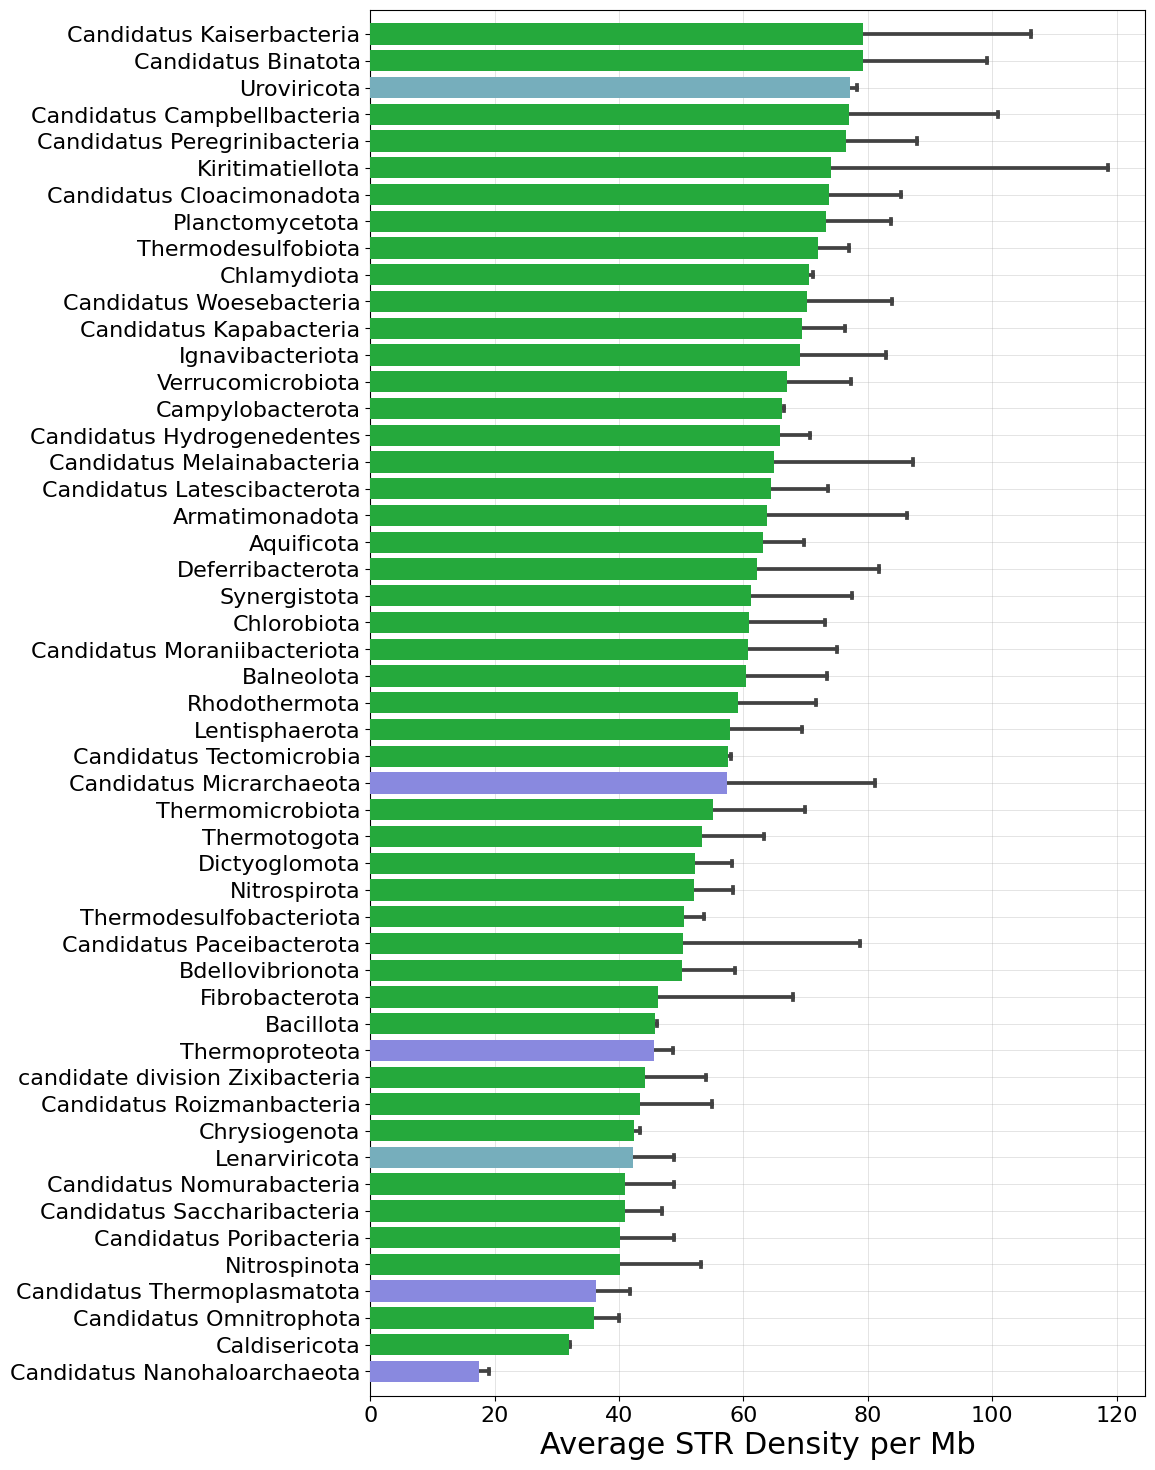

In [63]:
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(10, 18))
sns.barplot(x='tandemdensity', 
            y='phylum',
            data=bottom_phyla_df,
            orient="h",
            ax=ax2,
            alpha=1.0,
            dodge=False,
            width=0.8,
            capsize=.2,
            zorder=3,
            hue="kingdom",
            palette=kingdom_color_palette,
            order=mean_density_phyla[mean_density_phyla['phylum'].isin(bottom_phyla)].sort_values(by=['mean_coverage'], ascending=False)['phylum'].tolist(),
)        
ax2.grid(lw=0.4, alpha=0.6, zorder=0)
ax2.set_xlabel("Average STR Density per Mb")
ax2.xaxis.label.set_size(22)
ax2.set_ylabel("")
ax2.tick_params(axis="both", which="major", labelsize=16)
ax2.legend(loc=0, frameon=False, handles=[])
ax2.set_axisbelow(True)
ax2.margins(y=0.01)

fig2.savefig(f"{target}/microsatellite_coverage_over_bottom_phylums.png", bbox_inches='tight')
plt.show()
plt.close()

# Striplot for Phylums [Average STR Density per Mb]

In [66]:
tdf_accessions

,genome_size,gc_percent,organism_name,phylum,kingdom,superkingdom,coverage,length,tandemdensity,tandem_counts
#assembly_accession,,,,,,,,,,
GCA_900632045.1,22641838,19.0,Plasmodium falciparum,Apicomplexa,Protista,Eukaryota,109181.993087,2472081,6163.633889,139556.0
GCF_000002765.6,23292622,19.5,Plasmodium falciparum 3D7,Apicomplexa,Protista,Eukaryota,108166.783456,2519488,6113.137456,142391.0
GCF_000848385.1,1801,42.0,Saccharomyces cerevisiae killer virus M1,None,Unclassified Viruses,Viruses,69405.885619,125,1110.494170,2.0
GCA_031087255.1,1042,42.5,Datura leaf curl betasatellite,None,Unclassified Viruses,Viruses,66218.809981,69,3838.771593,4.0
GCA_003652465.1,1051,48.5,Geminiviridae sp.,Cressdnaviricota,Shotokuvirae,Viruses,60894.386299,64,2854.424358,3.0
...,...,...,...,...,...,...,...,...,...,...
GCA_004079735.1,1767,48.5,Porcine circovirus 2,Cressdnaviricota,Shotokuvirae,Viruses,0.000000,0,0.000000,NaN
GCA_031113065.1,8304,48.0,VESV-like calicivirus,Pisuviricota,Orthornavirae,Viruses,0.000000,0,0.000000,NaN
GCA_004078715.1,1767,49.0,Porcine circovirus 2,Cressdnaviricota,Shotokuvirae,Viruses,0.000000,0,0.000000,NaN


In [82]:
median_phylum = tdf_accessions.groupby("phylum", as_index=False)\
                                .agg(mean_coverage=("tandemdensity", "mean"))\
                                .sort_values(by=['mean_coverage'], ascending=False)\
                                .reset_index(drop=True)

grouped_per_phylum = tdf_accessions.reset_index()\
                         .merge(median_phylum, how="inner", on="phylum")\
                        .set_index("#assembly_accession")\
                        .sort_values(by=["tandemdensity"], ascending=False)

grouped_per_phylum.loc[:, "kingdom"] = grouped_per_phylum["kingdom"].apply(lambda x: x if x in {"Fungi", "Plantae", "Animalia", "Eubacteria", "Archaeabacteria", "Protista"} else "Viruses")
grouped_per_phylum

,genome_size,gc_percent,organism_name,phylum,kingdom,superkingdom,coverage,length,tandemdensity,tandem_counts,mean_coverage
#assembly_accession,,,,,,,,,,,
GCA_900632045.1,22641838,19.0,Plasmodium falciparum,Apicomplexa,Protista,Eukaryota,109181.993087,2472081,6163.633889,139556.0,1442.331627
GCF_000002765.6,23292622,19.5,Plasmodium falciparum 3D7,Apicomplexa,Protista,Eukaryota,108166.783456,2519488,6113.137456,142391.0,1442.331627
GCF_000287255.1,162504,14.0,Candidatus Carsonella ruddii CS isolate Thao2000,Pseudomonadota,Eubacteria,Bacteria,38005.218333,6176,3224.536011,524.0,90.044047
GCF_000287275.1,166163,14.0,Candidatus Carsonella ruddii HC isolate Thao2000,Pseudomonadota,Eubacteria,Bacteria,37499.322954,6231,3213.711837,534.0,90.044047
GCA_030849365.1,168917,15.0,Candidatus Carsonella ruddii,Pseudomonadota,Eubacteria,Bacteria,36497.214608,6165,3161.315913,534.0,90.044047
...,...,...,...,...,...,...,...,...,...,...,...
GCA_003084855.1,19530,42.5,African horse sickness virus 1,Duplornaviricota,Viruses,Viruses,0.000000,0,0.000000,NaN,109.000933
GCA_031314795.1,5762,46.0,Halyomorpha halys toti-like virus 1,Duplornaviricota,Viruses,Viruses,0.000000,0,0.000000,NaN,109.000933
GCA_031319185.1,3356,40.5,Enontekio alphachrysovirus,Duplornaviricota,Viruses,Viruses,0.000000,0,0.000000,NaN,109.000933


In [83]:
median_phylum[~median_phylum['phylum'].isin(set(mean_density_phyla['phylum']))]

,phylum,mean_coverage
5,Mollusca,735.950668
8,Heterolobosea,641.270516
9,Mucoromycota,496.308344
11,Bacillariophyta,391.274577
14,Rhodophyta,255.337197
34,Candidatus Krumholzibacteriota,118.065393
40,Candidatus Falkowbacteria,105.448042
54,Candidatus Beckwithbacteria,85.723430
79,Candidatus Delongbacteria,62.871689
83,Calditrichota,60.861204


In [84]:
median_phylum['phylum'].nunique() #.head(50)

128

In [85]:
total_phyla = median_phylum.shape[0]
top_phyla = set(median_phylum['phylum'].tolist()[:total_phyla // 2])
bottom_phyla = set(median_phylum['phylum'].tolist()[total_phyla //2:])
len(top_phyla), len(bottom_phyla)

(64, 64)

In [86]:
top_grouped_phylum = grouped_per_phylum[grouped_per_phylum['phylum'].isin(top_phyla)]
bottom_grouped_phylum = grouped_per_phylum[grouped_per_phylum['phylum'].isin(bottom_phyla)]

In [87]:
top_grouped_phylum.head()

,genome_size,gc_percent,organism_name,phylum,kingdom,superkingdom,coverage,length,tandemdensity,tandem_counts,mean_coverage
#assembly_accession,,,,,,,,,,,
GCA_900632045.1,22641838,19.0,Plasmodium falciparum,Apicomplexa,Protista,Eukaryota,109181.993087,2472081,6163.633889,139556.0,1442.331627
GCF_000002765.6,23292622,19.5,Plasmodium falciparum 3D7,Apicomplexa,Protista,Eukaryota,108166.783456,2519488,6113.137456,142391.0,1442.331627
GCF_000287255.1,162504,14.0,Candidatus Carsonella ruddii CS isolate Thao2000,Pseudomonadota,Eubacteria,Bacteria,38005.218333,6176,3224.536011,524.0,90.044047
GCF_000287275.1,166163,14.0,Candidatus Carsonella ruddii HC isolate Thao2000,Pseudomonadota,Eubacteria,Bacteria,37499.322954,6231,3213.711837,534.0,90.044047
GCA_030849365.1,168917,15.0,Candidatus Carsonella ruddii,Pseudomonadota,Eubacteria,Bacteria,36497.214608,6165,3161.315913,534.0,90.044047


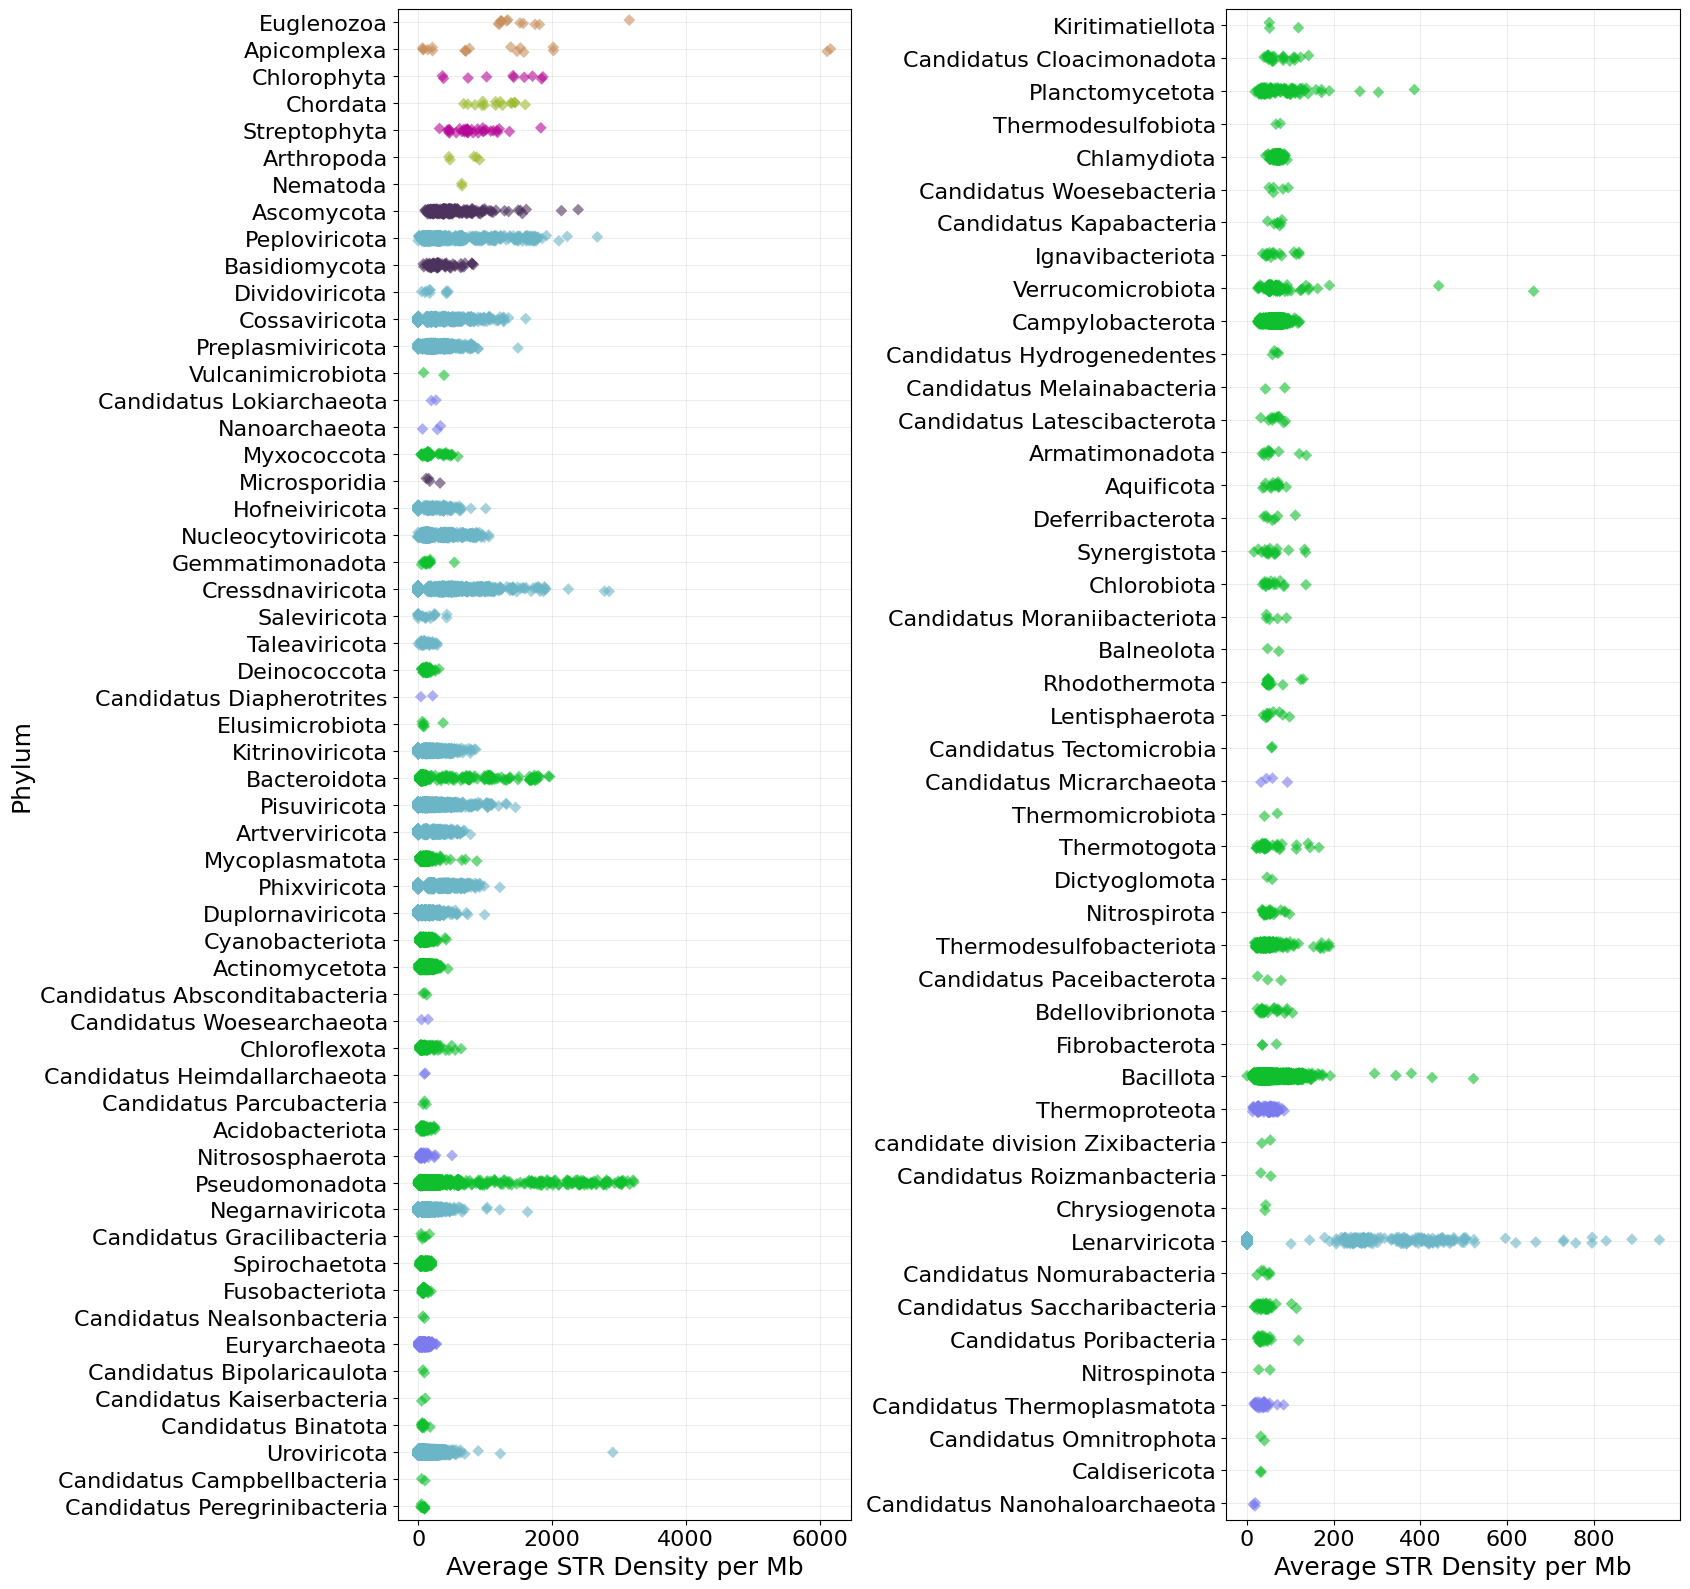

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 16))
sns.stripplot(data=top_grouped_phylum,
                    y="phylum",
                    x="tandemdensity",
                    hue="kingdom",
                    jitter=True, 
                    s=6,
                    marker='D',
                    palette=kingdom_color_palette,
                dodge=0.0,
                order=mean_density_phyla[mean_density_phyla['phylum'].isin(top_phyla)].sort_values(by=['mean_coverage'], ascending=False)['phylum'].tolist(),
                  alpha=0.6,
            ax=ax[0],
            zorder=3,
           )
sns.stripplot(data=bottom_grouped_phylum,
                    y="phylum",
                    x="tandemdensity",
                    hue="kingdom",
                      jitter=True, 
                      s=6,
                      marker='D',
                    palette=kingdom_color_palette,
                  alpha=0.6,
                order=mean_density_phyla[mean_density_phyla['phylum'].isin(bottom_phyla)].sort_values(by=['mean_coverage'], ascending=False)['phylum'].tolist(),
                dodge=0.0,
            ax=ax[1],
            zorder=3,
           )

for i in range(2):
    ax[i].xaxis.grid(True, linewidth=0.2, alpha=0.2, zorder=0)
    if i == 0:
        ax[i].set_ylabel("Phylum")
        ax[i].yaxis.label.set_size(18)
    else:
        ax[i].set_ylabel("")
    ax[i].grid(lw=0.4, alpha=0.4, zorder=0)
    ax[i].legend(handles=[], frameon=False)

    ax[i].set_xlabel("Average STR Density per Mb")
    ax[i].xaxis.label.set_size(18)
    ax[i].tick_params(axis="both", which="major", labelsize=16)
plt.tight_layout()
fig.savefig(f"{target}/stripplot_phylum_coverage.png", bbox_inches='tight')
plt.show();

# Viral Host Density

In [95]:
host_eukaryota = {'plants', 
                   'eukaryotic algae',
                   'invertebrates',
                   'fungi',
                  'land plants',
                  'human',
                  'protozoa',
                  'vertebrates'}

viruses = pd.read_csv("viruses.txt", delimiter="\t").query("Host != '-'")
viruses.loc[:, "hostRe"] = viruses["Host"].apply(lambda y: 'Eukaryota' if all(i.strip() in host_eukaryota for i in y.split(',')) else y.capitalize())
viruses = viruses[viruses['hostRe'].isin({'Bacteria', 'Archaea', 'Eukaryota'})]
viruses.head()

,#Organism/Name,TaxID,BioProject Accession,BioProject ID,Group,SubGroup,Size (Kb),GC%,Host,Segmemts,Genes,Proteins,Release Date,Modify Date,Status,hostRe
0,Plasmavirus L2,46014,NaN,0,Other,Plasmaviridae,11.965,32,bacteria,Unknown:NC_001447.1/L13696.1,14,14,1993/06/11,2020/12/20,Complete Genome,Bacteria
1,Pseudoalteromonas phage PM2,2905728,NaN,0,Other,Corticoviridae,10.079,42.2,bacteria,Unknown:NC_000867.1/AF155037.1,22,22,1999/07/13,2021/12/22,Complete Genome,Bacteria
2,Circular ssDNA virus sp.,2805939,PRJNA418044,418044,unclassified viruses,unclassified,2.201,57.8,"human,vertebrates",MG571900.1,-,2,2018/06/15,2018/06/20,Complete Genome,Eukaryota
3,Mushroom bacilliform virus,32625,NaN,0,Other,Barnaviridae,4.009,46.3,fungi,Unknown:NC_001633.1/U07551.1,4,4,1994/10/08,2018/08/13,Complete Genome,Eukaryota
4,Shrimp white spot syndrome virus,92652,NaN,0,Other,Nimaviridae,305.119,41,invertebrates,AF332093.3,-,524,2001/11/20,2014/11/14,Complete Genome,Eukaryota


In [96]:
viruses.hostRe.unique()

array(['Bacteria', 'Eukaryota', 'Archaea'], dtype=object)

In [97]:
tdf_viral_accessions = tdf_accessions.query("superkingdom == 'Viruses'").reset_index()\
                            .merge(viruses[['#Organism/Name', 'hostRe']].drop_duplicates(), 
                                   left_on="organism_name", 
                                   right_on="#Organism/Name", 
                                   how="inner"
                                  )
                            
tdf_viral_accessions

,#assembly_accession,genome_size,gc_percent,organism_name,phylum,kingdom,superkingdom,coverage,length,tandemdensity,tandem_counts,#Organism/Name,hostRe
0,GCF_000848385.1,1801,42.0,Saccharomyces cerevisiae killer virus M1,None,Unclassified Viruses,Viruses,69405.885619,125,1110.494170,2.0,Saccharomyces cerevisiae killer virus M1,Eukaryota
1,GCA_003652465.1,1051,48.5,Geminiviridae sp.,Cressdnaviricota,Shotokuvirae,Viruses,60894.386299,64,2854.424358,3.0,Geminiviridae sp.,Eukaryota
2,GCA_003652045.1,1264,43.0,Geminiviridae sp.,Cressdnaviricota,Shotokuvirae,Viruses,9493.670886,12,791.139241,1.0,Geminiviridae sp.,Eukaryota
3,GCA_003659425.1,2258,53.0,Geminiviridae sp.,Cressdnaviricota,Shotokuvirae,Viruses,6643.046944,15,442.869796,1.0,Geminiviridae sp.,Eukaryota
4,GCA_022930905.1,5031,50.0,Geminiviridae sp.,Cressdnaviricota,Shotokuvirae,Viruses,4770.423375,24,397.535281,2.0,Geminiviridae sp.,Eukaryota
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43736,GCF_000880895.1,8759,42.0,Bougainvillea chlorotic vein banding virus,Artverviricota,Pararnavirae,Viruses,0.000000,0,0.000000,NaN,Bougainvillea chlorotic vein banding virus,Eukaryota
43737,GCA_031123335.1,7511,49.0,Norovirus Hu/GII-4/Kumamoto4/2006/JP,Pisuviricota,Orthornavirae,Viruses,0.000000,0,0.000000,NaN,Norovirus Hu/GII-4/Kumamoto4/2006/JP,Eukaryota
43738,GCF_000892555.1,2824,45.0,Sweet potato golden vein associated virus,Cressdnaviricota,Shotokuvirae,Viruses,0.000000,0,0.000000,NaN,Sweet potato golden vein associated virus,Eukaryota
43739,GCF_001678375.1,10122,46.5,Nakiwogo virus,Kitrinoviricota,Orthornavirae,Viruses,0.000000,0,0.000000,NaN,Nakiwogo virus,Eukaryota


In [99]:
tdf_viral_accessions["hostRe"].unique()

array(['Eukaryota', 'Bacteria', 'Archaea'], dtype=object)

In [98]:
tdf_viral_accessions[['#assembly_accession', 'organism_name', 'hostRe']].to_csv("viral_hosts.txt.gz", sep="\t", index=False, compression="gzip")

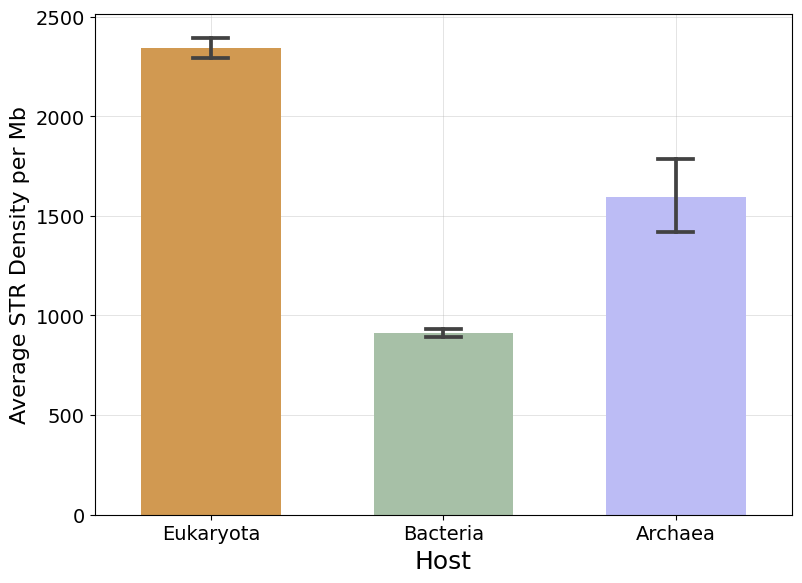

In [107]:
fig = plt.figure(figsize=(9, 6.5)) 
ax = sns.barplot(x='hostRe', 
                 y='coverage', 
                 data=tdf_viral_accessions, 
                 dodge=False,
                 errorbar=('ci', 99),
                 width=0.6,
                 capsize = 0.15,
                 palette=domain_colors,
                 alpha=1.0)

ax.xaxis.grid(True, linewidth=0.4, alpha=0.6, zorder=0)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_axisbelow(True)
ax.set_xlabel("Host")
ax.set_ylabel("Average STR Density per Mb")
ax.xaxis.label.set_size(18)


ax.yaxis.label.set_size(16)
ax.tick_params(axis="both",  which="major", labelsize=14)
fig.savefig(f"{target}/microsatellite_coverage_barplot_viral_host.png", bbox_inches='tight')
plt.show()